**<h1 style="text-align: center;">[Your Project Title]</h1>**

**<h3 style="text-align: center;">[Your Name]</h3>**

---

## **Section 1. Business Understanding**

### **1.1 Context**

The dataset contains customer information from a telecom company including demographics, services subscribed, account information, and churn status. The business context is to predict customer churn to enable targeted retention strategies.

### **1.2 Problem Statements**

- Which customers are likely to churn?
- What factors influence customer churn the most?
- How can the company reduce churn and improve customer retention?

### **1.3 Goals**

- Develop a predictive model to classify customers as churn or no churn.
- Identify key features affecting churn.
- Provide actionable insights for business to reduce churn.

### **1.4 Analytical Approach**

- Use supervised machine learning classification techniques.
- Data preprocessing including cleaning, feature engineering.
- Model development with benchmarking, tuning, and evaluation.
- Model explanation using feature importance and SHAP values.

### **1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

- Business Metric: Reduction in churn rate.
- Machine Learning Evaluation Metric: Accuracy, Precision, Recall, F1-score, ROC-AUC.

### **1.6 Success Criteria**

- Achieve high classification performance (e.g., ROC-AUC > 0.80).
- Provide interpretable insights for business decisions.
- Demonstrate model effectiveness on unseen data.

## **Section 2. Data Understanding**

### **2.1 General Information**

- Dataset contains customer records with attributes related to demographics, services, contracts, billing, and churn.
- Target variable: Churn (Yes/No).

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

real_df = pd.read_csv(r'C:\Users\User\Documents\Purwadhika\JCDS 2602\Capstone Project\telco-churn\data\raw\data.csv')
df = real_df.copy()

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **2.2 Feature Information**

| Feature            | Description                                      | Impact to Business                                         |
|--------------------|------------------------------------------------|------------------------------------------------------------|
| customerID         | Unique customer identifier                       | Identification, no direct impact                            |
| gender             | Customer gender (Male, Female)                   | Possible demographic influence                              |
| SeniorCitizen      | Whether the customer is a senior citizen (0,1)  | May affect churn due to different needs                    |
| Partner            | Whether customer has a partner (Yes, No)        | Social factors influencing churn                            |
| Dependents         | Whether customer has dependents (Yes, No)       | Social factors influencing churn                            |
| tenure             | Number of months customer has stayed             | Longer tenure usually means lower churn                     |
| PhoneService       | Whether customer has phone service (Yes, No)    | Service usage influence                                     |
| MultipleLines      | Whether customer has multiple lines (Yes, No, No phone service) | Service usage influence                                     |
| InternetService    | Type of internet service (DSL, Fiber optic, No) | Service type impact on churn                                |
| OnlineSecurity     | Whether customer has online security (Yes, No, No internet service) | Service feature impact                                      |
| OnlineBackup       | Whether customer has online backup (Yes, No, No internet service) | Service feature impact                                      |
| DeviceProtection   | Whether customer has device protection (Yes, No, No internet service) | Service feature impact                                      |
| TechSupport        | Whether customer has tech support (Yes, No, No internet service) | Service feature impact                                      |
| StreamingTV        | Whether customer streams TV (Yes, No, No internet service) | Service feature impact                                      |
| StreamingMovies    | Whether customer streams movies (Yes, No, No internet service) | Service feature impact                                      |
| Contract           | Contract type (Month-to-month, One year, Two year) | Contract length impact on churn                             |
| PaperlessBilling   | Whether customer uses paperless billing (Yes, No) | Billing preference impact                                   |
| PaymentMethod      | Payment method used                               | Billing method impact                                       |
| MonthlyCharges     | Monthly charges                                  | Financial factor influencing churn                          |
| TotalCharges       | Total charges to date                            | Financial factor influencing churn                          |
| Churn              | Whether customer churned (Yes, No)              | Target variable                                            |

In [2]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [3]:
categories = [col for col in df.select_dtypes(include=['object']).columns if col != 'customerID']
df[categories] = df[categories].astype('category')

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### **2.3 Statistics Summary**

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [7]:
df.describe(include=['object','category']).transpose()

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


- Tenure ranges from 0 to 72 months.
- MonthlyCharges vary widely, indicating different service usage.
- Churn rate can be calculated from the 'Churn' column (proportion of 'Yes').

## **Section 3. Data Cleaning**

### **3.1 Missing Values**

- Some missing values in TotalCharges (noted as blank in the dataset).
- Handle missing values by imputation or removal.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Axes: >

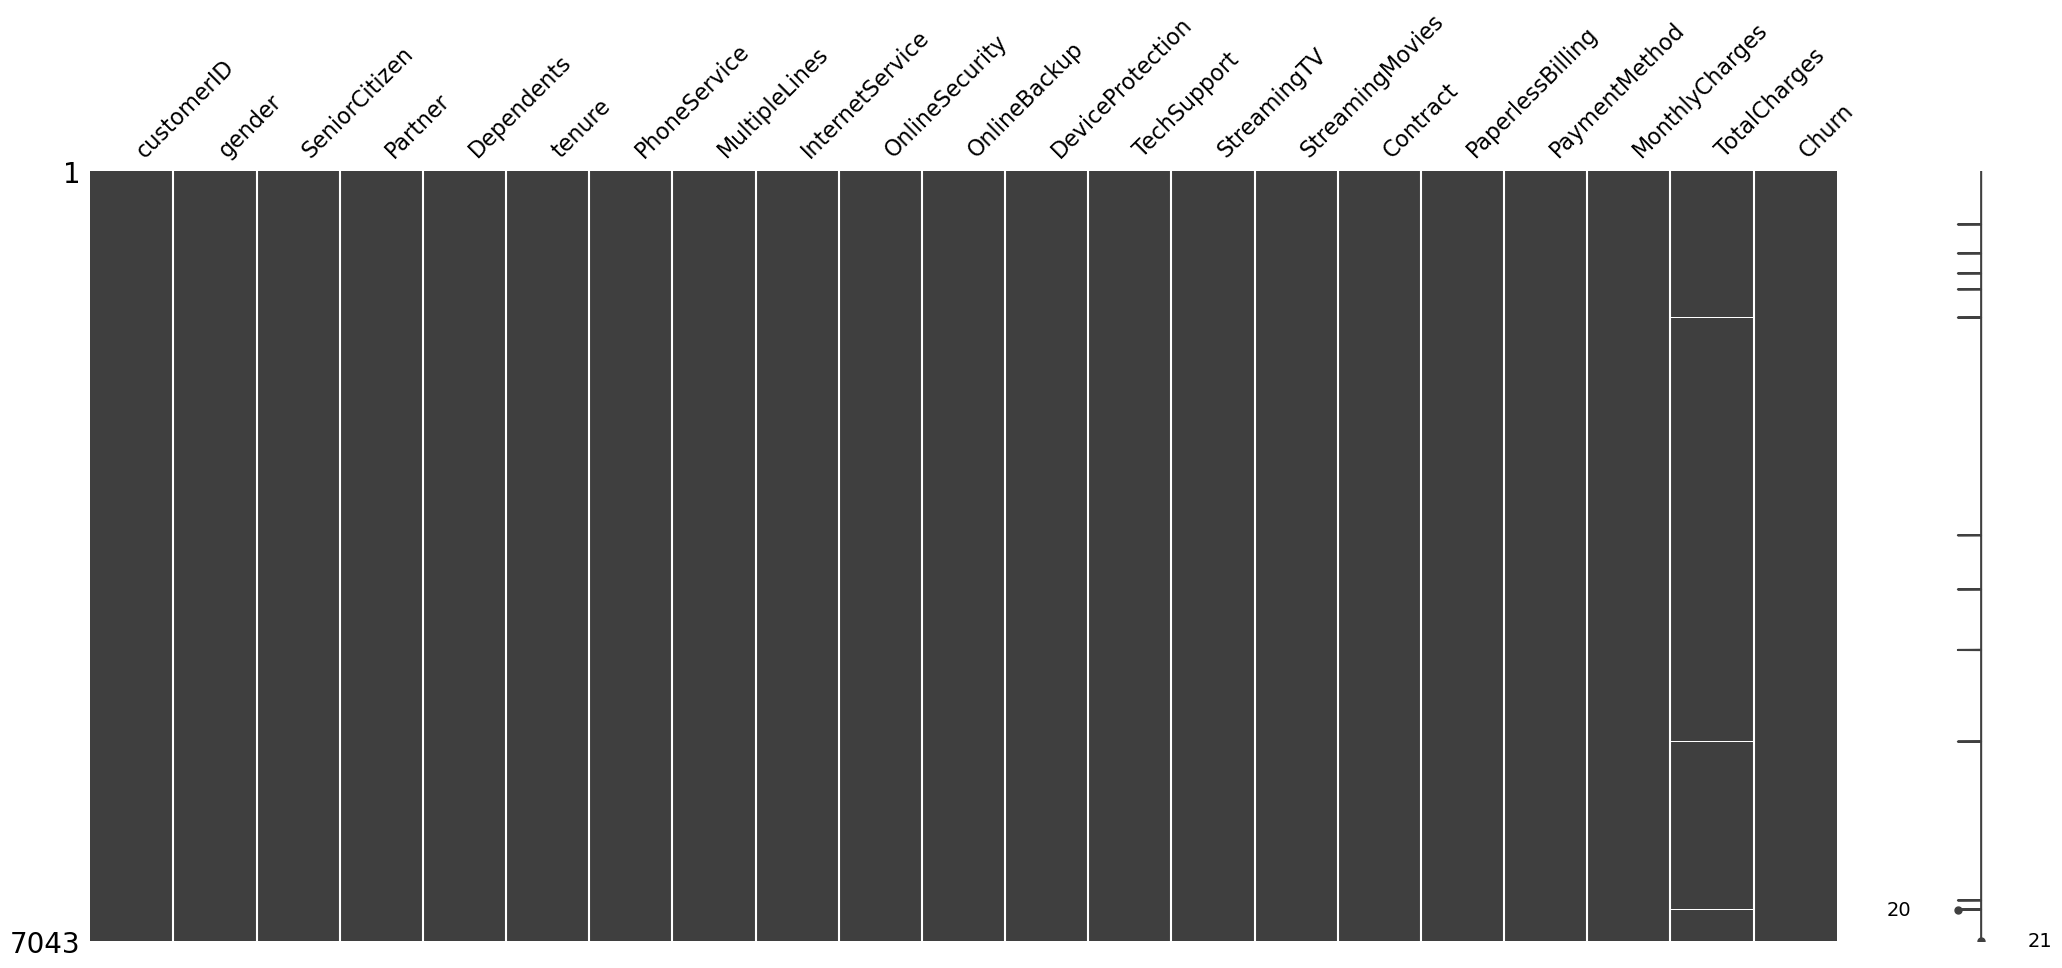

In [8]:
import missingno as msno

print(df.isnull().sum())
msno.matrix(df)

### **3.2 Duplicated Values**

- Check for duplicated customerID or rows; no explicit duplicates noted.

In [9]:
df.duplicated().sum()

0

### **3.3 Identify Spelling Errors**

- Categorical variables such as PaymentMethod, InternetService appear consistent; no spelling errors noted.

### **3.4 Identify Anomaly Values**

In [10]:
# Numerical distributions for MonthlyCharges and TotalCharges to be checked for outliers.

In [11]:
# Cardinality checks on categorical variables to understand unique values.
columns = df.columns
unique = dict()
nunique = dict()
for col in columns:
    unique[col] = df[col].nunique()

for col in columns: 
    nunique[col] = df[col].unique().tolist()

unique_df = pd.DataFrame({'unique':unique, 'nunique':nunique})
unique_df

,unique,nunique
customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,2,"[Female, Male]"
SeniorCitizen,2,"[No, Yes]"
Partner,2,"[Yes, No]"
Dependents,2,"[No, Yes]"
tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,2,"[No, Yes]"
MultipleLines,3,"[No phone service, No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"


## **Section 4. Data Generation**

### **4.1 Constructing `Seen` and `Unseen` Data**

Split dataset into training (seen) and testing (unseen) sets.

### **4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

Further split training data into training and validation sets.

## **Section 5. Exploratory Data Analysis (EDA)**

### **5.1 Analysis 1**

Distribution of churn across contract types, tenure, and payment methods.

### **5.2 Analysis 2**

Correlation analysis between features and churn.

## **Section 6. Data Preparation**

### **6.1 Initialization**

- Define features and target variable.
- Initialization function to load and preprocess data.

### **6.2 Data Transformation (Feature Engineering)**

- Encoding categorical variables.
- Scaling numerical features.
- Creating new features if relevant.

### **6.3 Overview**

- Summary of prepared dataset for modeling.

## **Section 7. Model Development**

### **7.1 Initialization**

- Initialize model pipeline and evaluation metrics.
- Define custom metrics if needed.
- Create a workflow of the experiment ?

### **7.2 Developing the Model Pipeline**

- Build machine learning pipeline including preprocessing and model.

### **7.3 Model Benchmarking (Comparing model base performance)**

- Evaluate multiple algorithms (e.g., Logistic Regression, Random Forest, XGBoost).

### **7.4 Tune Model**

- Hyperparameter tuning using grid search or randomized search.

### **7.5 Analyze Model**

- Evaluate model on test data.
- Residual analysis and learning curves.
- Learning Curve Inspection ?

### **7.6 Model Calibration (Classification Only)**

- Calibrate probabilities for better decision thresholding.

### **7.7 Model Explanation and Interpretation**

- Feature importance via tree-based models.
- SHAP value analysis.
- Counterfactual analysis for churn prediction.

## **Section 8. Model Deployment**

- Outline deployment strategy for real-time or batch predictions.

## **Section 9. Model Implementation**

### **9.1 How to implement the model ?**


- Integrate model into business systems for churn prediction.
- Use API or batch jobs for scoring customers.

### **9.2 What are the limitations of the model ?**

- Model depends on data quality and feature relevance.
- Changes in customer behavior or services may reduce model accuracy over time.

### **9.3 Business Calculation (Simulation using unseen data)**

- Simulate retention interventions based on model predictions.

## **Section 10. Conclusion and Recommendation**

### **10.1 Conclusion**

- Model: The developed model predicts churn with good accuracy and provides insights into key factors.
- Business: Understanding churn drivers enables targeted retention strategies.

### **10.2 Recommendation**

- Model: Regularly update and monitor model performance.
- Business: Use model insights to improve customer service, contract offerings, and billing options to reduce churn.